In [24]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

## Data Loading

In [25]:
df = pd.read_csv(r'https://raw.githubusercontent.com/baothanhquach1661/DataSet/main/loan_approval_dataset.csv')

In [26]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [27]:
print(f"dataset (row, col): {df.shape}")

dataset (row, col): (4269, 13)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## Data Cleaning

In [29]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [30]:
duplicated = df[df.duplicated()].shape[0]
print(f"Count of duplicated value: {duplicated}")

Count of duplicated value: 0


## EDA

In [31]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [41]:
# List of numerical columns to plot
num_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 
            'residential_assets_value', 'commercial_assets_value', 
            'luxury_assets_value', 'bank_asset_value']

In [42]:
Plot histograms for numerical columns
plt.figure(figsize=(15, 30))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [43]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


ValueError: Could not interpret input 'loan_status'

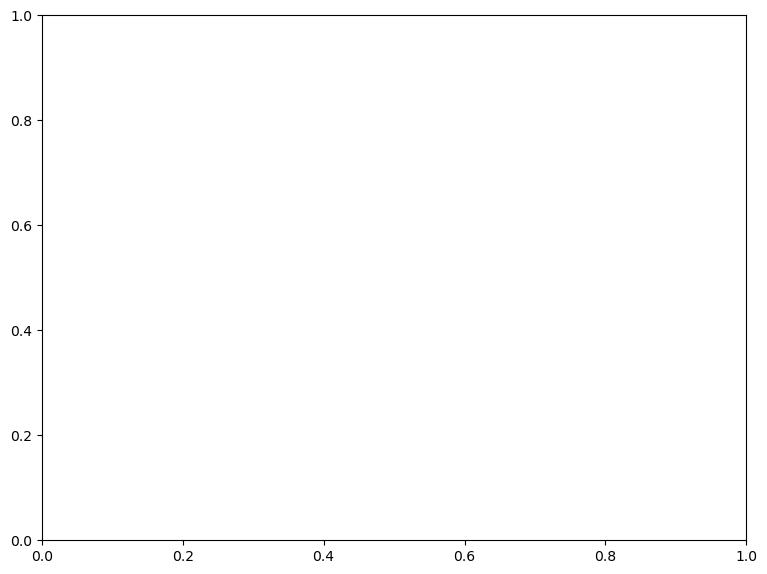

In [44]:
plt.figure(figsize=(20, 15))

# Bar plot showing the count of approved and rejected loans
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Count')

# Histogram of CIBIL scores divided by loan status
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='cibil_score', hue='loan_status', multiple='stack', binwidth=50)
plt.title('CIBIL Score Distribution by Loan Status')

# Boxplot comparing the income of approved and rejected loans
plt.subplot(2, 2, 3)
sns.boxplot(data=df, y='income_annum', x='loan_status')
plt.title('Annual Income by Loan Status')

# Scatter plot of loan amount vs income, colored by loan status
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='income_annum', y='loan_amount', hue='loan_status')
plt.title('Loan Amount vs Annual Income')

plt.tight_layout()
plt.show()

#### Insights:
    . Loan Status Count: The number of approved is higher than rejected
    . CIBIL Score Distribution by Loan Status: It appears that higer score mostly approved.Score < 500 typically rejected.
    . Annual Income by Loan Status: Income may not be a strong predictor of loan approval.
    . Loan amount vs annual income: 

In [35]:
# Cross Tabulation Heatmap
cross_tab = pd.crosstab(index=[df.education, df.self_employed], columns=df.loan_status)
sns.heatmap(cross_tab, annot=True, fmt='d')
plt.title('Cross Tabulation of Loan Status by Education and Emp Status')

AttributeError: 'DataFrame' object has no attribute 'education'

In [36]:
# Correlation matrix
corr_matrix = df[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation of numerical variables')

KeyError: "None of [Index(['income_annum', 'loan_amount', 'loan_term', 'cibil_score',\n       'residential_assets_value', 'commercial_assets_value',\n       'luxury_assets_value', 'bank_asset_value'],\n      dtype='object')] are in the [columns]"

#### Insights:
    . There is clearly correlation between loan_amount and income_amount. Higher incomes are more likely to apply for larger loans

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_cols),
                                               ('cat', OneHotEncoder(), ['education', 'self_employed'])])

le = LabelEncoder()

X = df.drop('loan_status', axis=1)
y = le.fit_transform(df['loan_status'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit and transform the training data with the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the testing data with the preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
X_train_preprocessed.shape, X_test_preprocessed.shape

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

def print_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        preds = model.predict(X_train)
        model_report = pd.DataFrame(classification_report(y_train, preds, output_dict=True))
        printmd("<b style='font-size:16px'>Train Result: </b> \n")
        print(f"Accuracy Score: {accuracy_score(y_train, preds) * 100:.2f}%")
        print("-"*66)
        print(f"Classification Report: \n {model_report}")
        print("-"*66)
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, preds)}")
    elif train == False:
        preds = model.predict(X_test)
        model_report = pd.DataFrame(classification_report(y_test, preds, output_dict=True))
        printmd("<b style='font-size:16px'>Test Result: </b> \n")
        print(f"Accuracy Score: {accuracy_score(y_test, preds) * 100:.2f}%")
        print("-"*66)
        print(f"Classification Report: \n {model_report}")
        print("-"*66)
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, preds)} \n")

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_preprocessed, y_train)

print_score(log_model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, train=True)
print_score(log_model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, train=False)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_preprocessed, y_train)

print_score(dt_model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, train=True)
print_score(dt_model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, train=False)

## Support Vector Machine 

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_model.fit(X_train_preprocessed, y_train)

print_score(svm_model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, train=True)
print_score(svm_model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, train=False)

## KNN - KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_preprocessed, y_train)

print_score(knn_model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, train=True)
print_score(knn_model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, train=False)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

print_score(rf_model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, train=True)
print_score(rf_model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, train=False)

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=1)
ada_model.fit(X_train_preprocessed, y_train)

print_score(ada_model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, train=True)
print_score(ada_model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, train=False)